<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/Portfolio_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program optimizes a stock portfolio

In [ ]:
#Import libraries
import pandas as pd 
import numpy as np
import requests
import time
import pandas_datareader as web
import matplotlib.pyplot as plt

import bs4 as bs
import datetime as dt
import os
import pickle

In [ ]:
SP500 = []

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

SP500 = save_sp500_tickers()

In [ ]:
df = pd.DataFrame()
# = ['GOOG', 'AAPL', 'FB', 'BABA', 'AMZN', 'GE', 'AMD', 'WMT', 'BAC', 'GM','T', 'UAA', 'SHLD', 'XOM', 'RRC', 'BBY', 'MA', 'PFE', 'JPM', 'SBUX']

for symbol in SP500:
  df[symbol] = web.DataReader(symbol, data_source = "yahoo", start = "2000-01-01", end = "2021-03-01")['Adj Close']
  time.sleep(0.1)

In [ ]:
assets = df.columns
assets

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=505)

In [ ]:
pip install PyPortfolioOpt

In [ ]:
#Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
df = df.drop(['CARR'], axis=1)
df

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,...,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,27.588531,8.867177,NaN,18.250000,NaN,1.227555,16.274673,15.500000,NaN,27.958862,7.438281,44.530334,18.621439,321.250000,7.868539,6.238040,14.894078,7.375000,NaN,NaN,5.326941,14.065693,NaN,NaN,1.702026,89.375000,NaN,11.713037,NaN,12.158134,34.263245,909.068970,24.821152,NaN,NaN,3.069404,2.400775,49.803715,1.907741,30.033604,...,2.746333,6.302719,1.410081,161.444855,NaN,19.847641,18.781250,4.027720,NaN,10.236141,NaN,9.261608,28.216412,1.948559,7.907868,45.211544,20.081261,23.093716,10.428306,25.750000,4.719151,10.792249,3.912322,5.464892,3.091555,NaN,NaN,36.033833,35.979042,11.052004,NaN,NaN,7.575456,33.075779,NaN,4.942507,25.027779,NaN,39.731110,NaN
2000-01-04,26.492285,8.613833,NaN,17.812500,NaN,1.190215,14.909401,14.625000,NaN,26.850151,7.240898,41.128731,18.053926,300.000000,7.770181,6.238040,14.566414,6.937500,NaN,NaN,5.326941,13.616785,NaN,NaN,1.715643,81.937500,NaN,11.713037,NaN,12.303166,32.969528,862.604126,24.556538,NaN,NaN,2.859848,2.392877,45.995495,1.842141,28.514210,...,2.719408,6.261614,1.410081,159.958847,NaN,19.206057,17.281250,3.985235,NaN,9.763706,NaN,9.261608,28.126823,1.888603,7.792850,43.519833,19.334257,24.446487,10.390792,24.500000,4.750098,10.257810,3.896417,5.521347,3.680422,NaN,NaN,34.680153,34.596634,10.806897,NaN,NaN,7.749890,32.324043,NaN,4.843161,24.666666,NaN,37.807178,NaN
2000-01-05,27.259663,8.597999,NaN,18.000000,NaN,1.194882,15.204173,15.000000,NaN,27.139378,7.199343,38.577507,18.160334,283.500000,7.812334,6.346341,14.298310,7.281250,NaN,NaN,5.587701,14.215322,NaN,NaN,1.706565,69.750000,NaN,12.166157,NaN,12.762423,32.132133,864.654297,25.297466,NaN,NaN,3.081731,2.416568,47.578125,1.801362,28.930502,...,2.818132,6.477414,1.388049,151.148895,NaN,19.847641,17.000000,3.942748,NaN,9.921185,NaN,9.504421,30.007927,1.858626,7.764096,42.631660,19.553959,25.461063,10.428306,26.031250,4.966712,10.154366,4.007741,5.498766,3.435061,NaN,NaN,36.517303,35.105930,11.475365,NaN,NaN,8.048921,31.616535,NaN,4.867997,25.138889,NaN,37.762455,NaN
2000-01-06,29.452133,8.898850,NaN,18.031250,NaN,1.171544,15.328290,16.000000,NaN,27.356295,7.344778,37.108631,19.366287,236.125000,7.819360,6.562939,14.030217,7.750000,NaN,NaN,5.587701,14.140509,NaN,NaN,1.674794,65.562500,NaN,12.120844,NaN,12.834932,32.786777,891.030029,25.032852,NaN,NaN,3.315943,2.400775,48.369442,1.751718,28.139589,...,2.907882,6.494541,1.410081,131.724564,NaN,19.761124,16.750000,3.883266,NaN,9.973678,NaN,9.625827,30.052696,1.966546,7.447780,43.096897,18.982725,24.446487,10.353282,25.250000,4.951241,10.602608,4.214490,5.442310,3.582278,NaN,NaN,38.225521,35.396976,11.720476,NaN,NaN,7.974163,28.874968,NaN,4.826602,23.777779,NaN,38.299366,NaN
2000-01-07,30.036783,8.993855,NaN,17.937500,NaN,1.204217,16.072983,16.250000,NaN,27.886553,7.490223,40.201000,20.714132,248.375000,8.107402,6.454638,14.298310,8.250000,NaN,NaN,5.662206,14.664229,NaN,NaN,1.720181,69.562500,NaN,12.302084,NaN,13.004128,33.264126,957.720215,26.408865,NaN,NaN,3.747386,2.432364,53.809784,1.769448,28.930502,...,2.871982,6.535645,1.388049,144.209732,NaN,19.615213,18.218750,3.968240,NaN,10.498606,NaN,9.695199,30.142279,1.936569,7.160223,46.353497,19.466076,24.059982,9.940647,26.031250,5.013132,10.792249,4.278104,5.498766,4.416508,NaN,NaN,36.968540,35.506123,12.032422,NaN,NaN,7.974163,32.147175,NaN,4.718976,23.513889,NaN,38.388844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
#Calculate the expected returns and covariance
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)
print(mu)
print(s)

max = mu.max()
min = mu.min()

print(max)
print(min)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


MMM     0.091830
ABT     0.132264
ABBV    0.196703
ABMD    0.145963
ACN     0.173033
          ...   
YUM     0.155446
ZBRA    0.153582
ZBH     0.095468
ZION    0.015334
ZTS     0.232574
Length: 504, dtype: float64
           MMM       ABT      ABBV  ...       ZBH      ZION       ZTS
MMM   0.059359  0.023240  0.022806  ...  0.027204  0.045679  0.021746
ABT   0.023240  0.062425  0.029384  ...  0.027256  0.026769  0.030306
ABBV  0.022806  0.029384  0.081855  ...  0.028880  0.027266  0.031596
ABMD  0.032588  0.030511  0.029150  ...  0.034578  0.059692  0.030368
ACN   0.030876  0.025135  0.025355  ...  0.030043  0.041909  0.029570
...        ...       ...       ...  ...       ...       ...       ...
YUM   0.030698  0.023676  0.020052  ...  0.029651  0.045662  0.026466
ZBRA  0.032750  0.024022  0.029602  ...  0.032651  0.050044  0.034533
ZBH   0.027204  0.027256  0.028880  ...  0.081967  0.043689  0.028218
ZION  0.045679  0.026769  0.027266  ...  0.043689  0.206365  0.024082
ZTS   0.021746 

In [ ]:
#Optimize sharpe ratio
#ef = EfficientFrontier(mu,s,weight_bounds=(-1,1))
ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MMM', 0.0), ('ABT', 0.0), ('ABBV', 0.0), ('ABMD', 0.0), ('ACN', 0.0), ('ATVI', 0.0), ('ADBE', 0.0), ('AMD', 0.0), ('AAP', 0.0), ('AES', 0.0), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0), ('AKAM', 0.0), ('ALK', 0.0), ('ALB', 0.0), ('ARE', 0.0), ('ALXN', 0.0), ('ALGN', 0.0), ('ALLE', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('MO', 0.0), ('AMZN', 0.0), ('AMCR', 0.0), ('AEE', 0.0), ('AAL', 0.0), ('AEP', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0), ('AMP', 0.0), ('ABC', 0.0), ('AME', 0.0), ('AMGN', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('ANTM', 0.0), ('AON', 0.0), ('AOS', 0.0), ('APA', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('APTV', 0.0), ('ADM', 0.0), ('ANET', 0.0), ('AJG', 0.0), ('AIZ', 0.0), ('T', 0.0), ('ATO', 0.0), ('ADSK', 0.0), ('ADP', 0.0), ('AZO', 0.0), ('AVB', 0.0), ('AVY', 0.0), ('BKR', 0.0), ('BLL', 0.0), ('BAC', 0.0), ('BK', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('BRK-B', 0.0), ('BBY', 0.0), ('BIO', 0.0), ('BIIB', 0.0), ('B

(0.4019253446755795, 0.21933128106587554, 1.7413172567978084)

In [ ]:
pip install pulp

In [ ]:
#Get the discrete allocation 
from pypfopt.discrete_allocation import  DiscreteAllocation, get_latest_prices

portfolio_val = 100000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds Remaining: $', leftover)

Discrete allocation: {'CZR': 44, 'CDW': 33, 'CHTR': 21, 'DG': 58, 'DPZ': 15, 'GNRC': 17, 'HRL': 120, 'MNST': 93, 'NFLX': 4, 'OTIS': 158, 'PAYC': 30, 'RF': 1, 'NOW': 8, 'TSLA': 15, 'TSCO': 14}
Funds Remaining: $ 14.61386489868164


In [ ]:
#Create a function to get the companies name
def get_company_name(symbol):
  url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
  result = requests.get(url).json()
  for r in result['ResultSet']['Result']:
    if r['symbol'] == symbol:
      return r['name']


In [ ]:
#Store the company name into a list
company_name = []
for symbol in allocation:
  company_name.append(get_company_name(symbol))

In [ ]:
#Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [ ]:
#Creare a data for the portfolio
portfolio_df = pd.DataFrame(columns=['Company_name','Company_Ticker', 'Discrete_val_'+str(portfolio_val)]) 

portfolio_df['Company_name'] =  company_name
portfolio_df['Company_Ticker'] =  allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] =  discrete_allocation_list

portfolio_df

,Company_name,Company_Ticker,Discrete_val_100000
0,"Caesars Entertainment, Inc.",CZR,44
1,CDW Corporation,CDW,33
2,"Charter Communications, Inc.",CHTR,21
3,Dollar General Corporation,DG,58
4,"Domino's Pizza, Inc.",DPZ,15
5,Generac Holdings Inc.,GNRC,17
6,Hormel Foods Corporation,HRL,120
7,Monster Beverage Corporation,MNST,93
8,"Netflix, Inc.",NFLX,4
9,Otis Worldwide Corporation,OTIS,158


In [ ]:
from pypfopt import plotting

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


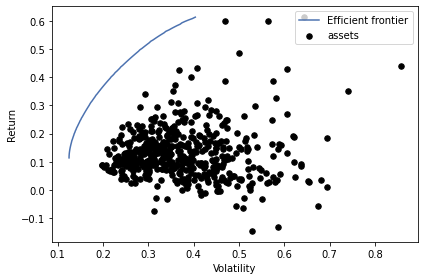

In [ ]:
# Efficient Frontier
ef = EfficientFrontier(mu, s)
#ef.add_constraint(lambda w: w[0] >= 0.2)
#ef.add_constraint(lambda w: w[2] == 0.15)
#ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

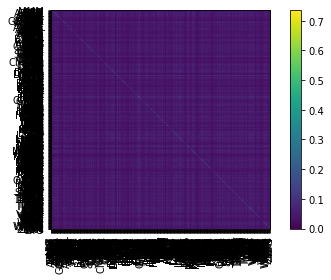

In [ ]:
cov = plotting.plot_covariance(s, plot_correlation=False, show_tickers=True)